<!-- Notebook title -->
# Title

# 1. Notebook Description

### 1.1 Task Description
<!-- 
- A brief description of the problem you're solving with machine learning.
- Define the objective (e.g., classification, regression, clustering, etc.).
-->

TODO

### 1.2 Useful Resources
<!--
- Links to relevant papers, articles, or documentation.
- Description of the datasets (if external).
-->

### 1.2.1 Data

#### 1.2.1.1 Common

* [Datasets Kaggle](https://www.kaggle.com/datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A vast repository of datasets across various domains provided by Kaggle, a platform for data science competitions.
  
* [Toy datasets from Sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of small datasets that come with the Scikit-learn library, useful for quick prototyping and testing algorithms.
  
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)  
  &nbsp;&nbsp;&nbsp;&nbsp;A widely-used repository for machine learning datasets, with a variety of real-world datasets available for research and experimentation.
  
* [Google Dataset Search](https://datasetsearch.research.google.com/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A tool from Google that helps to find datasets stored across the web, with a focus on publicly available data.
  
* [AWS Public Datasets](https://registry.opendata.aws/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A registry of publicly available datasets that can be analyzed on the cloud using Amazon Web Services (AWS).
  
* [Microsoft Azure Open Datasets](https://azure.microsoft.com/en-us/services/open-datasets/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of curated datasets from various domains, made available by Microsoft Azure for use in machine learning and analytics.
  
* [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A GitHub repository that lists a wide variety of datasets across different domains, curated by the community.
  
* [Data.gov](https://www.data.gov/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A portal to the US government's open data, offering access to a wide range of datasets from various federal agencies.
  
* [Google BigQuery Public Datasets](https://cloud.google.com/bigquery/public-data)  
  &nbsp;&nbsp;&nbsp;&nbsp;Public datasets hosted by Google BigQuery, allowing for quick and powerful querying of large datasets in the cloud.
  
* [Papers with Code](https://paperswithcode.com/datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A platform that links research papers with the corresponding code and datasets, helping researchers reproduce results and explore new data.
  
* [Zenodo](https://zenodo.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;An open-access repository that allows researchers to share datasets, software, and other research outputs, often linked to academic publications.
  
* [The World Bank Open Data](https://data.worldbank.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A comprehensive source of global development data, with datasets covering various economic and social indicators.
  
* [OpenML](https://www.openml.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;An online platform for sharing datasets, machine learning experiments, and results, fostering collaboration in the ML community.
  
* [Stanford Large Network Dataset Collection (SNAP)](https://snap.stanford.edu/data/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of large-scale network datasets from Stanford University, useful for network analysis and graph-based machine learning.
  
* [KDnuggets Datasets](https://www.kdnuggets.com/datasets/index.html)  
  &nbsp;&nbsp;&nbsp;&nbsp;A curated list of datasets for data mining and data science, compiled by the KDnuggets community.


#### 1.2.1.2 Project

### 1.2.2 Learning

* [K-Nearest Neighbors on Kaggle](https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors)

* [Complete Guide to K-Nearest-Neighbors](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor)

### 1.2.3 Documentation

---

# 2. Setup

## 2.1 Imports
<!--
- Import necessary libraries (e.g., `numpy`, `pandas`, `matplotlib`, `scikit-learn`, etc.).
-->

In [1]:
from ikt450.src.common_imports import *
from ikt450.src.config import get_paths
from ikt450.src.common_func import load_dataset, save_dataframe, ensure_dir_exists

import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


c:\ProgramData\anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\ProgramData\anaconda3\envs\pytorch\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


device(type='cpu')

## 2.2 Global Variables
<!--
- Define global constants, paths, and configuration settings used throughout the notebook.
-->

### 2.2.1 Paths

In [2]:
paths = get_paths()

### 2.2.2 Seed

In [3]:
RANDOM_SEED = 7

### 2.2.3 Split ratio

In [4]:
SPLITRATIO = 0.8

## 2.3 Function Definitions
<!--
- Define helper functions that will be used multiple times in the notebook.
- Consider organizing these into separate sections (e.g., data processing functions, model evaluation functions).
-->

# 4. Data Processing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].


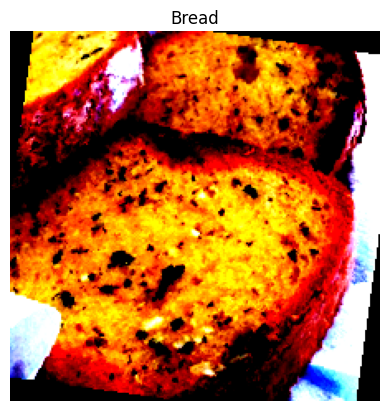

In [16]:
# LOAD IMAGE
# Load the image from the dataset
#  and display the image
#  and display the class name of the

def load_image(dataset, index):
    image, label = dataset[index]
    plt.imshow(image.permute(1, 2, 0))
    plt.title(train_dataset.classes[label])
    plt.axis("off")
    plt.show()

load_image(train_dataset, 0)
# nually add date stamps (e.g. October 11, 2024) on the images 
#  and display the images with the date stamps

import matplotlib.pyplot as plt
import numpy as np
import random
import datetime
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms.functional import to_pil_image, to_tensor


def add_date_stamp(image_tensor, date):
    # Convert Tensor to PIL Image for adding text
    image = to_pil_image(torch.clamp(image_tensor, 0, 1))  # Ensure values are in [0, 1]
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    draw.text((10, 10), date, font=font, fill=(255, 255, 255))
    # Convert back to Tensor to keep it compatible with machine learning pipelines
    return to_tensor(image)

# Load and display image with date stamp for testing
def load_image_with_date_stamp(dataset, index):
    image_tensor, label = dataset[index]
    date = datetime.datetime.now().strftime("%B %d, %Y")
    image_with_date = add_date_stamp(image_tensor, date)
    plt.imshow(image_with_date.permute(1, 2, 0))  # Convert to [H, W, C] for matplotlib
    plt.title(dataset.classes[label])
    plt.axis("off")
    plt.show()




In [19]:
import datetime
import torch
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image, to_tensor
from PIL import ImageDraw, ImageFont
import torchvision.datasets as datasets

# Mean and std for normalization
mean = [0.485, 0.456, 0.406]  # ImageNet mean
std = [0.229, 0.224, 0.225]   # ImageNet std

# Custom transformation to add a date stamp
class AddDateStampTransform:
    def __init__(self):
        self.date = datetime.datetime.now().strftime("%B %d, %Y")

    def __call__(self, image_tensor):
        # Convert Tensor to PIL Image for adding text
        image = to_pil_image(torch.clamp(image_tensor, 0, 1))  # Clamp values to [0, 1]
        draw = ImageDraw.Draw(image)
        font = ImageFont.load_default()
        draw.text((10, 10), self.date, font=font, fill=(255, 255, 255))
        # Convert back to Tensor
        return to_tensor(image)

# Define the common transformation sequence without adding the date stamp
base_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),        # Randomly crop the image to 224x224
    transforms.RandomHorizontalFlip(),        # Randomly flip the image horizontally
    transforms.RandomRotation(15),            # Randomly rotate the image by 15 degrees
    transforms.ColorJitter(                   # Randomly change brightness, contrast, saturation, and hue
        brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

# Custom dataset to apply transformations separately for the stamped and non-stamped versions
class StampedImageDataset(torch.utils.data.Dataset):
    def __init__(self, root, base_transform, stamp_transform=None):
        self.dataset = datasets.ImageFolder(root=root)
        self.base_transform = base_transform
        self.stamp_transform = stamp_transform if stamp_transform else lambda x: x

    def __getitem__(self, index):
        # Load image and apply base transformation
        img, label = self.dataset[index]
        transformed_img = self.base_transform(img)
        
        # Create stamped image by applying the stamp transformation
        stamped_img = self.stamp_transform(transformed_img.clone())
        
        return stamped_img, transformed_img, label

    def __len__(self):
        return len(self.dataset)

# Initialize dataset with stamping transformation
train_dataset = StampedImageDataset(
    root=f"{paths['PATH_COMMON_DATASETS']}/food11/training",
    base_transform=base_transform,
    stamp_transform=AddDateStampTransform()
)

# You can load it into a DataLoader as usual
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)


In [36]:

# Load and display image from dataloader


---

# 5. Model Development

In [37]:
# create an auto encoder model

import torch.nn as nn
import torch.nn.functional as F

class encoder(nn.Module):
    def __init__(self):
        super(encoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        return x

class decoder(nn.Module):
    def __init__(self):
        super(decoder, self).__init__()
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 3, 2, stride=2)
        
    def forward(self, x):
        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))
        return x


In [ ]:

encoder_model = encoder()
decoder_model = decoder()
encoder_model.to(device)
decoder_model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
params = list(encoder_model.parameters()) + list(decoder_model.parameters())
optimizer = torch.optim.Adam(params, lr=0.001)



In [41]:

# Train the autoencoder model
num_epochs = 10
for epoch in range(num_epochs):

    loss_epoch = 0
    for data in train_loader:
        stamped_images, base_images, _ = data
        stamped_images = stamped_images.to(device)
        base_images = base_images.to(device)
        
        # Forward pass
        encoded = encoder_model(stamped_images)
        outputs = decoder_model(encoded)
        loss = criterion(outputs, base_images)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()

        loss_epoch += loss.item()
        optimizer.step()
        
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss_epoch:.4f}")

Epoch [1/10], Loss: 331.2804
Epoch [2/10], Loss: 328.4360
Epoch [3/10], Loss: 325.7633
Epoch [4/10], Loss: 324.4309
Epoch [5/10], Loss: 324.0291
Epoch [6/10], Loss: 323.9158
Epoch [7/10], Loss: 323.0160
Epoch [8/10], Loss: 323.4843
Epoch [9/10], Loss: 322.6459
Epoch [10/10], Loss: 323.5803


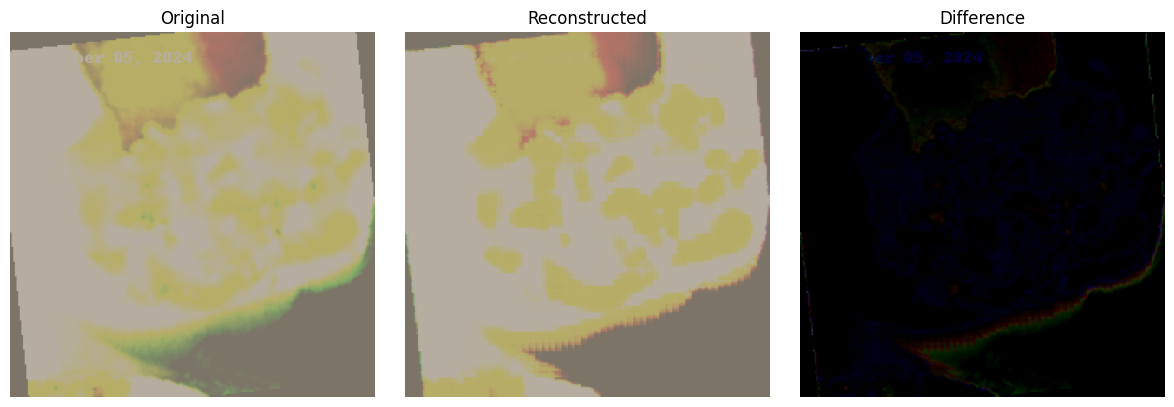

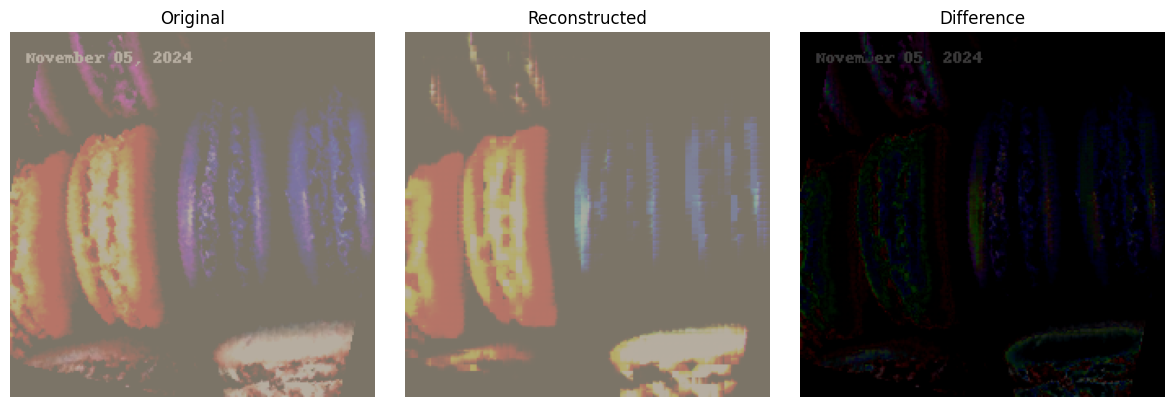

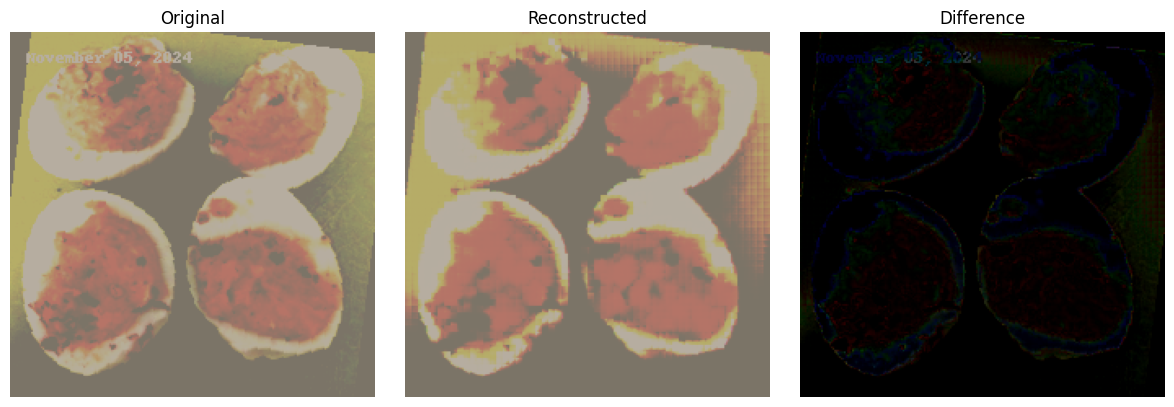

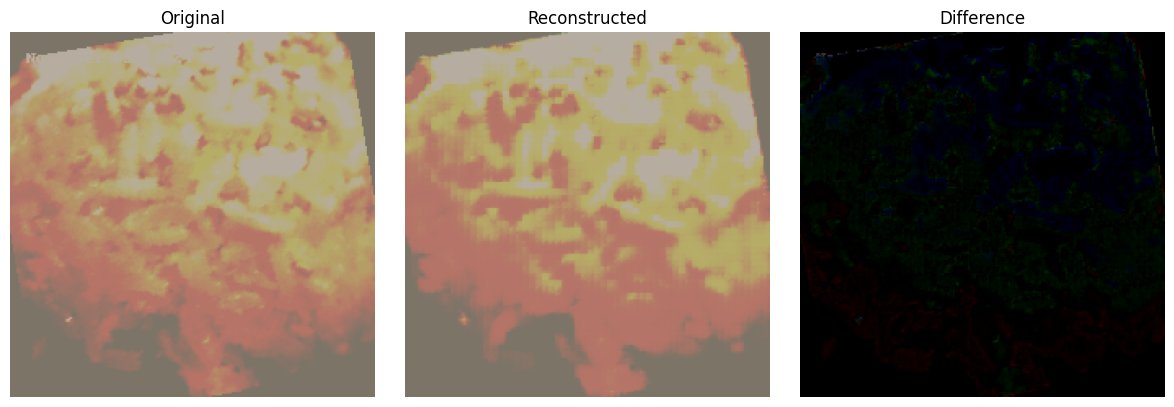

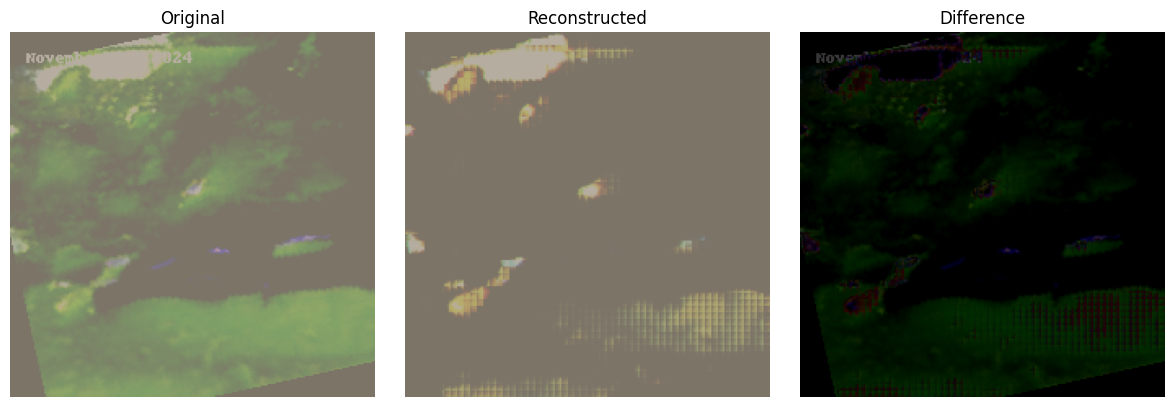

In [45]:
# display the original image and the reconstructed image
#  and display the difference between the original and the reconstructed image

def display_images(original, reconstructed):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    for ax in axes:
        ax.axis("off")
    # denormalize images
    original = original * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)
    reconstructed = reconstructed * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)

    
    axes[0].imshow(original.permute(1, 2, 0))
    axes[0].set_title("Original")
    
    axes[1].imshow(reconstructed.permute(1, 2, 0))
    axes[1].set_title("Reconstructed")
    
    diff = torch.abs(original - reconstructed)
    axes[2].imshow(diff.permute(1, 2, 0))
    axes[2].set_title("Difference")
    
    plt.tight_layout()
    plt.show()




# Load a batch of images and display the original and reconstructed images
data_iter = iter(train_loader)
stamped_images, base_images, _ = next(data_iter)
stamped_images = stamped_images.to(device)
base_images = base_images.to(device)
with torch.no_grad():
    encoded = encoder_model(stamped_images)
    outputs = decoder_model(encoded)

for i in range(5):
    display_images(stamped_images[i], outputs[i])



## 5.1 Model Selection
<!--
- Choose the model(s) to be trained (e.g., linear regression, decision trees, neural networks).
-->

## 5.2 Model Training
<!--
- Train the selected model(s) using the training data.
-->

## 5.3 Model Evaluation
<!--
- Evaluate model performance on validation data.
- Use appropriate metrics (e.g., accuracy, precision, recall, RMSE).
-->

## 5.4 Hyperparameter Tuning
<!--
- Fine-tune the model using techniques like Grid Search or Random Search.
- Evaluate the impact of different hyperparameters.
-->

## 5.5 Model Testing
<!--
- Evaluate the final model on the test dataset.
- Ensure that the model generalizes well to unseen data.
-->

## 5.6 Model Interpretation (Optional)
<!--
- Interpret the model results (e.g., feature importance, SHAP values).
- Discuss the strengths and limitations of the model.
-->

---

# 6. Predictions


## 6.1 Make Predictions
<!--
- Use the trained model to make predictions on new/unseen data.
-->

## 6.2 Save Model and Results
<!--
- Save the trained model to disk for future use.
- Export prediction results for further analysis.
-->

---

# 7. Documentation and Reporting

## 7.1 Summary of Findings
<!--
- Summarize the results and findings of the analysis.
-->

## 7.2 Next Steps
<!--
- Suggest further improvements, alternative models, or future work.
-->

## 7.3 References
<!--
- Cite any resources, papers, or documentation used.
-->